Data Science Capstone Project - Healthcare

Week 1: Data Exploration

(1) Read Data and Perform descriptive analysis:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="dark", color_codes=True)
sns.set(font_scale=1.1)

In [2]:
health_data = pd.read_csv('health care diabetes.csv')

In [3]:
health_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


According to problem statement, a value of zero in the following columns indicates missing value:

- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

I will the replace all zeros in these columns with null values.

In [4]:
cols_with_null_as_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [5]:
health_data[cols_with_null_as_zero] = health_data[cols_with_null_as_zero].replace(0, np.NaN)

In [6]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [7]:
health_data.shape

(768, 9)

In [8]:
health_data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
health_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(2) Visually explore these variables using histograms. Treat the missing values accordingly:

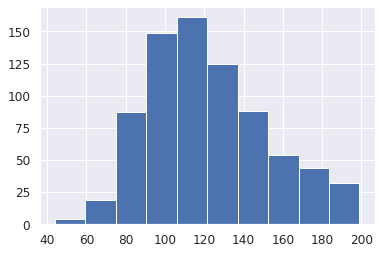

In [10]:
health_data['Glucose'].hist();

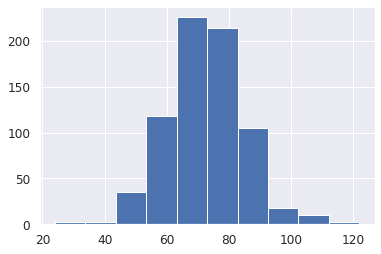

In [11]:
health_data['BloodPressure'].hist();

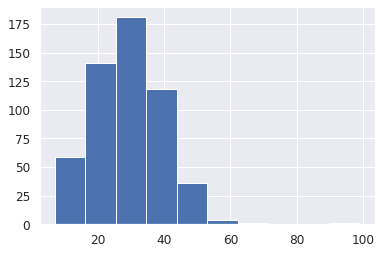

In [12]:
health_data['SkinThickness'].hist();

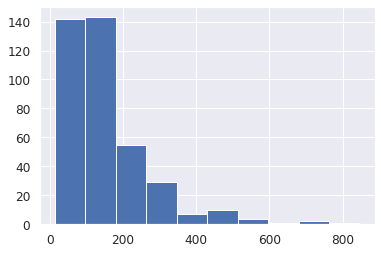

In [13]:
health_data['Insulin'].hist();

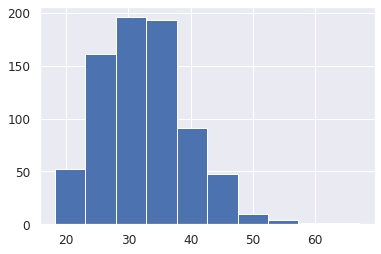

In [14]:
health_data['BMI'].hist();

According to the above histograms, I can clearly see that "Insulin" has divaricated data distribution
and the remaining 4 variables have balanced data distribution therefore i will treat missing values in these 5 variables as below:

- Glucose - replace missing values with mean of values.
- BloodPressure - replace missing values with mean of values.
- SkinThickness - replace missing values with mean of values.
- Insulin - replace missing values with median of values.
- BMI - replace missing values with mean of values.

In [15]:
health_data['Insulin'] = health_data['Insulin'].fillna(health_data['Insulin'].median())

In [16]:
cols_mean_for_null = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']

In [17]:
health_data[cols_mean_for_null] = health_data[cols_mean_for_null].fillna(health_data[cols_mean_for_null].mean())

(3) There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

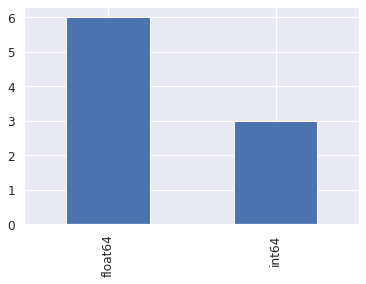

In [18]:
health_data.dtypes.value_counts().plot(kind='bar');

Data Exploration:

(4) Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

In [19]:
health_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot: >

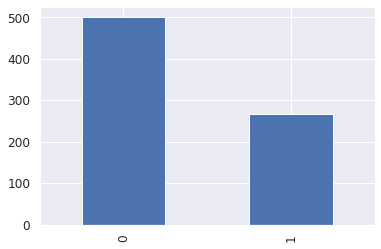

In [20]:
health_data['Outcome'].value_counts().plot(kind='bar')

Since classes in Outcome is a bit divaricated, I will generate new samples using 
SMOTE (Synthetic Minority Oversampling Technique) for the class '1' which is under-represented in our data. 
I will use SMOTE out of many other techniques available since it can generate new samples by interpolation and it doesn't duplicate data.

In [21]:
health_data_X = health_data.drop('Outcome', axis=1)
health_data_y = health_data['Outcome']

In [22]:
print(health_data_X.shape)

(768, 8)


In [23]:
print(health_data_y.shape)

(768,)


In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
health_data_X_resampled, health_data_y_resampled = SMOTE(random_state=108).fit_resample(health_data_X, health_data_y)

In [26]:
print(health_data_X_resampled.shape)

(1000, 8)


In [27]:
print(health_data_y_resampled.shape)

(1000,)


In [28]:
health_data_y_resampled.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

<AxesSubplot: >

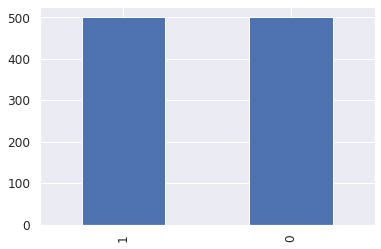

In [29]:
health_data_y_resampled.value_counts().plot(kind='bar')

(5) Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

In [30]:
health_data_resampled = pd.concat([health_data_X_resampled, health_data_y_resampled], axis=1)

In [31]:
health_data_resampled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000000,72.000000,35.000000,125.000000,33.600000,0.627000,50,1
1,1,85.000000,66.000000,29.000000,125.000000,26.600000,0.351000,31,0
2,8,183.000000,64.000000,29.153420,125.000000,23.300000,0.672000,32,1
3,1,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21,0
4,0,137.000000,40.000000,35.000000,168.000000,43.100000,2.288000,33,1
...,...,...,...,...,...,...,...,...,...
995,3,164.686765,74.249021,29.153420,125.000000,42.767110,0.726091,29,1
996,0,138.913540,69.022720,27.713033,127.283849,39.177649,0.703702,24,1
997,10,131.497740,66.331574,33.149837,125.000000,45.820819,0.498032,38,1
998,0,105.571347,83.238205,29.153420,125.000000,27.728596,0.649204,60,1


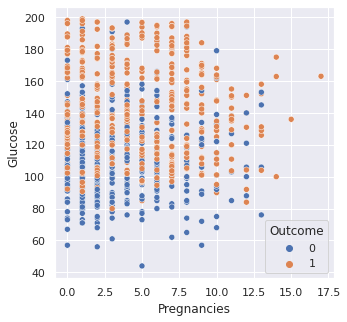

In [32]:
sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(x="Pregnancies", y="Glucose", data=health_data_resampled, hue="Outcome");

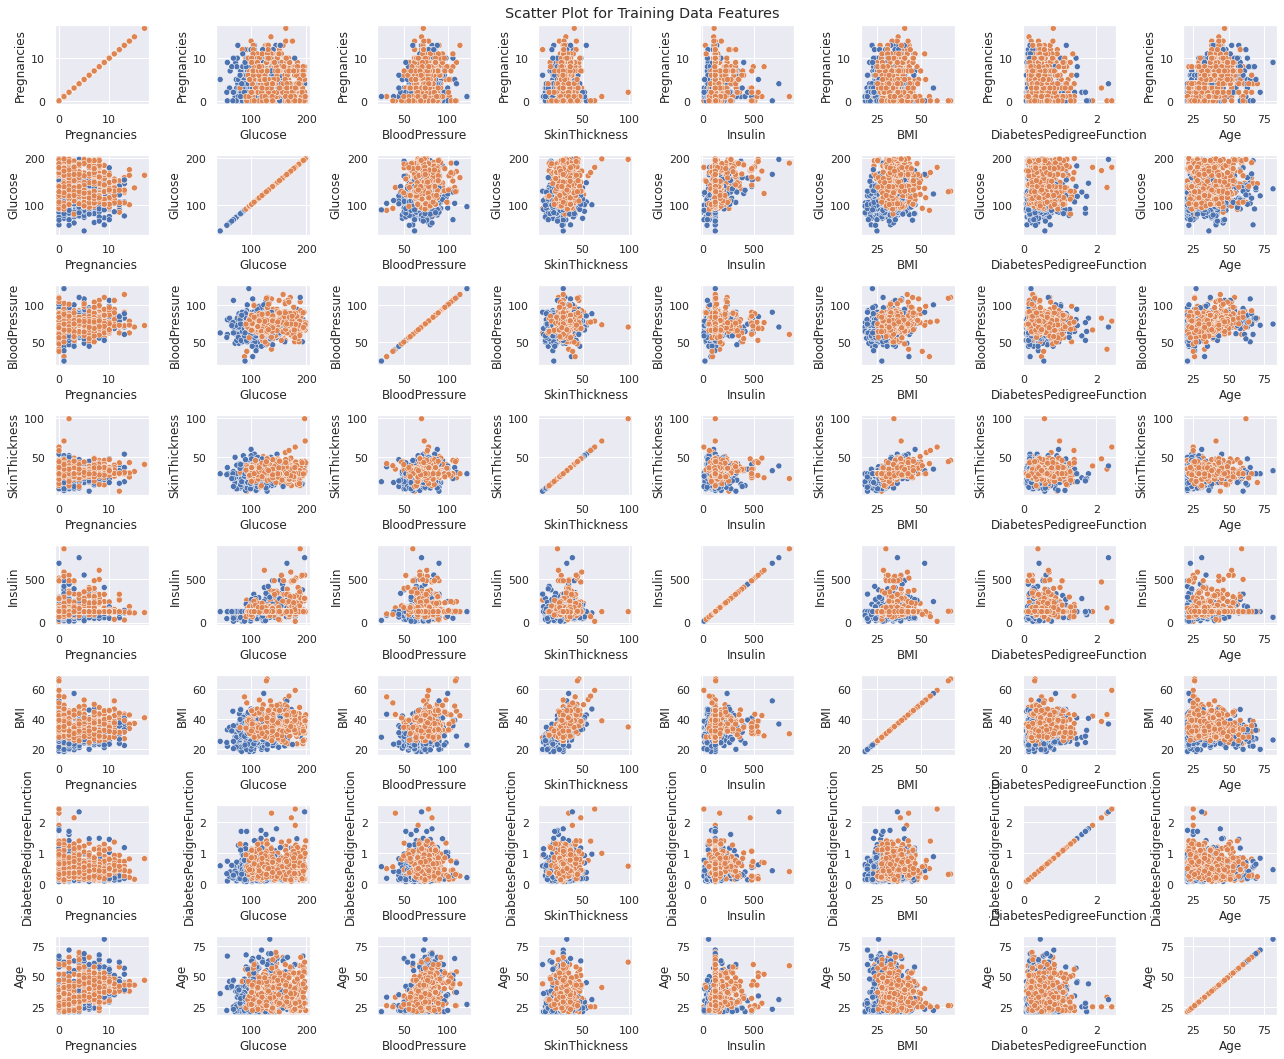

In [36]:
fig, axes = plt.subplots(8, 8, figsize=(18, 15))
fig.suptitle('Scatter Plot for Training Data Features')

for i, col_y in enumerate(health_data_X_resampled.columns):
    for j, col_x in enumerate(health_data_X_resampled.columns):             
        sns.scatterplot(ax=axes[i, j], x=col_x, y=col_y, data=health_data_resampled, hue="Outcome", legend = False)

plt.tight_layout()

My observations are as follows:

- Glucose is good to discern between the Outcome classes.
- Age is also able to discern between classes to some extent.
- It looks like none of  the pairs in the dataset are able to clealry discern between the Outcome classes.
- I have to use combination of features to build model for prediction of classes in Outcome.

(6) Perform correlation analysis. Visually explore it using a heat map.

In [37]:
health_data_X_resampled.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.079953,0.205232,0.082752,0.009365,0.021006,-0.040210,0.532660
Glucose,0.079953,1.000000,0.200717,0.189776,0.418830,0.242501,0.138945,0.235522
BloodPressure,0.205232,0.200717,1.000000,0.176496,0.034861,0.277565,-0.005850,0.332015
SkinThickness,0.082752,0.189776,0.176496,1.000000,0.170719,0.538207,0.120799,0.117644
Insulin,0.009365,0.418830,0.034861,0.170719,1.000000,0.168702,0.115187,0.096940
BMI,0.021006,0.242501,0.277565,0.538207,0.168702,1.000000,0.177915,0.017529
DiabetesPedigreeFunction,-0.040210,0.138945,-0.005850,0.120799,0.115187,0.177915,1.000000,0.010532
Age,0.532660,0.235522,0.332015,0.117644,0.096940,0.017529,0.010532,1.000000


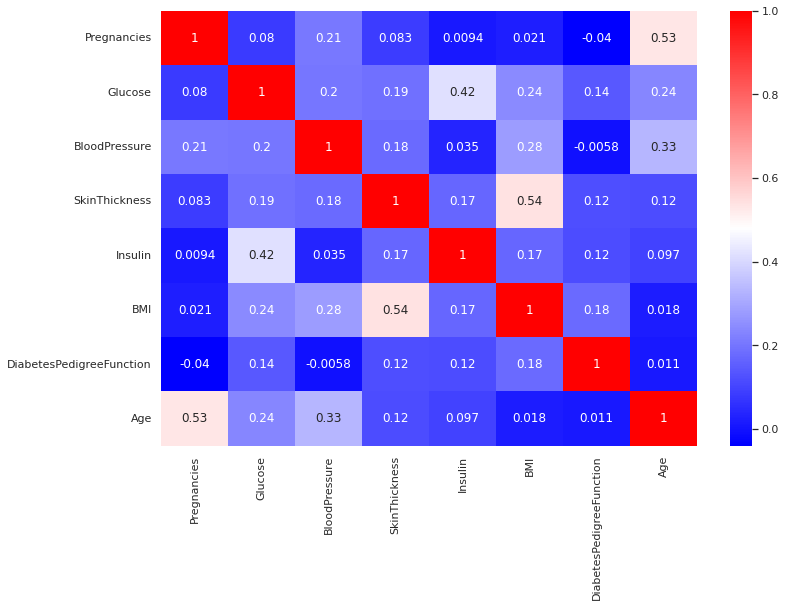

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(health_data_X_resampled.corr(), cmap='bwr', annot=True);

It appears from correlation matrix and heatmap that there existing significant correlations between some pairs such as:

- Age-Pregnancies
- BMI-SkinThickness

Also it is clear that no pair of variables have negative correlation.

Week 2: Data Modelling

(1) Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. 

In [40]:
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import  average_precision_score, f1_score, accuracy_score, confusion_matrix, classification_report, auc, roc_curve, roc_auc_score, precision_recall_curve

In [41]:
X_train, X_test, y_train, y_test = train_test_split(health_data_X_resampled, health_data_y_resampled, test_size=0.15, random_state =10)

In [42]:
X_train.shape

(850, 8)

In [43]:
X_test.shape

(150, 8)

(2) Apply an appropriate classification algorithm to build a model.

In [44]:
models = []
model_accuracy = []
model_f1 = []
model_auc = []

1. Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(max_iter=300)

In [52]:
lr1.fit(X_train,y_train)

LogisticRegression(max_iter=300)

In [53]:
lr1.score(X_train,y_train)

0.7294117647058823

In [54]:
lr1.score(X_test, y_test)

0.76

Performance evaluation and optimizing parameters using GridSearchCV: Logistic regression does not really have any critical hyperparameters to tune. However i will try to optimize one of its parameters 'C' with the help of GridSearchCV. So i have set this parameter as a list of values form which GridSearchCV will select the best value of parameter.

In [55]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [56]:
parameters = {'C':np.logspace(-5, 5, 50)}

In [57]:
gs_lr = GridSearchCV(lr1, param_grid = parameters, cv=5, verbose=0)
gs_lr.fit(health_data_X_resampled, health_data_y_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=300),
             param_grid={'C': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
       6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
       4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
       2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
       1.84206997e-02, 2.94705170e...
       7.90604321e-01, 1.26485522e+00, 2.02358965e+00, 3.23745754e+00,
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05])})

In [61]:
gs_lr.best_params_

{'C': 13.257113655901108}

In [62]:
gs_lr.best_score_

0.738

In [63]:
lr2 = LogisticRegression(C=13.257113655901108, max_iter=300)

In [64]:
lr2.fit(X_train,y_train)

LogisticRegression(C=13.257113655901108, max_iter=300)

In [65]:
lr2.score(X_train,y_train)

0.7305882352941176

In [66]:
lr2.score(X_train,y_train)

0.7305882352941176

AUC: 0.884


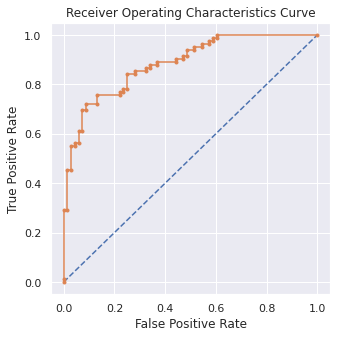

In [83]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = lr2.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_lr = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_lr)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics Curve");

f1=0.790 auc_pr=0.908 ap=0.909


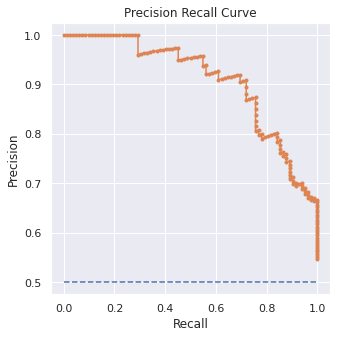

In [82]:
# Precision Recall Curve 

pred_y_test = lr2.predict(X_test)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_lr_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_lr_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve");

In [69]:
models.append('LR')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_lr)

2. Decision Tree:

In [71]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(random_state=0)

In [72]:
dt1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [73]:
# Decision Tree always 100% accuracy over train data
dt1.score(X_train,y_train)

1.0

In [74]:
dt1.score(X_test, y_test)

0.7733333333333333

Performance evaluation and optimizing parameters using GridSearchCV:

In [75]:
parameters = {
    'max_depth':[1,2,3,4,5,None]
}

In [76]:
gs_dt = GridSearchCV(dt1, param_grid = parameters, cv=5, verbose=0)
gs_dt.fit(health_data_X_resampled, health_data_y_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, None]})

In [77]:
gs_dt.best_params_

{'max_depth': 4}

In [78]:
gs_dt.best_score_

0.76

In [79]:
dt1.feature_importances_

array([0.06452226, 0.28556999, 0.06715314, 0.04979714, 0.07150365,
       0.20905992, 0.08573109, 0.16666279])

In [80]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

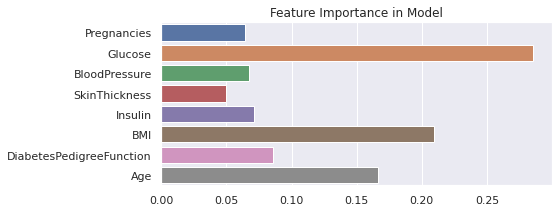

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,3))
sns.barplot(y=X_train.columns, x=dt1.feature_importances_)
plt.title("Feature Importance Model");

In [84]:
dt2 = DecisionTreeClassifier(max_depth=4)

In [85]:
dt2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [86]:
dt2.score(X_train,y_train)

0.8070588235294117

In [87]:
dt2.score(X_test, y_test)

0.82

f1=0.844 auc_pr=0.717 ap=0.868


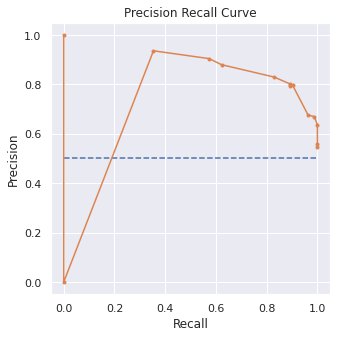

In [90]:
# Precision Recall Curve 

pred_y_test = dt2.predict(X_test)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_dt_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_dt_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve");

AUC: 0.879


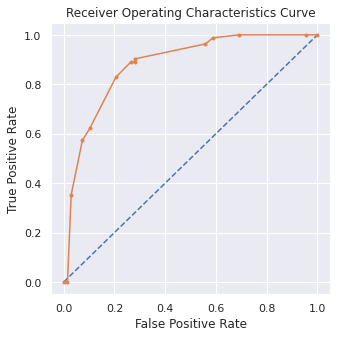

In [88]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = dt2.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_dt = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_dt)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics Curve");

In [91]:
models.append('DT')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_dt)

3) RandomForest Classifier

In [92]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()

In [93]:
rf1 = RandomForestClassifier(random_state=0)

In [94]:
rf1.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [95]:
# Random Forest also 100% accuracy over train data always
rf1.score(X_train, y_train)

1.0

In [96]:
rf1.score(X_test, y_test)

0.8466666666666667

Performance evaluation and optimizing parameters using GridSearchCV:

In [102]:
parameters = {
    'n_estimators': [50,100,150],
    'max_depth': [None,1,3,5,7],
    'min_samples_leaf': [1,3,5]
}

In [103]:
gs_dt = GridSearchCV(estimator=rf1, param_grid=parameters, cv=5, verbose=0)
gs_dt.fit(health_data_X_resampled, health_data_y_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 1, 3, 5, 7],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [50, 100, 150]})

In [104]:
gs_dt.best_params_

{'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}

In [105]:
gs_dt.best_score_

0.813

In [106]:
rf1.feature_importances_

array([0.06264995, 0.24106573, 0.08653626, 0.08301549, 0.09945063,
       0.17678287, 0.11685244, 0.13364664])

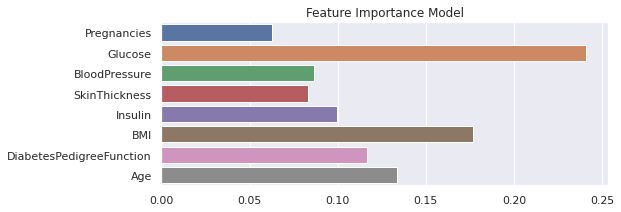

In [107]:
plt.figure(figsize=(8,3))
sns.barplot(y=X_train.columns, x=rf1.feature_importances_);
plt.title("Feature Importance Model");

In [108]:
rf2 = RandomForestClassifier(max_depth=None, min_samples_leaf=1, n_estimators=100)

In [109]:
rf2.fit(X_train,y_train)

RandomForestClassifier()

In [110]:
rf2.score(X_train,y_train)

1.0

In [111]:
rf2.score(X_test, y_test)

0.8533333333333334

f1=0.867 auc_pr=0.943 ap=0.942


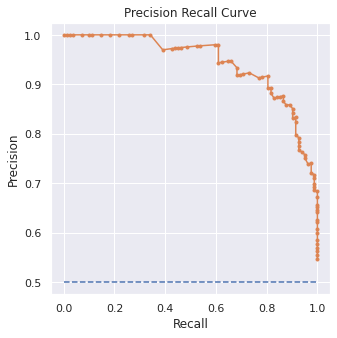

In [114]:
# Precision Recall Curve 

pred_y_test = rf2.predict(X_test)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_rf_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_rf_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve");

AUC: 0.931


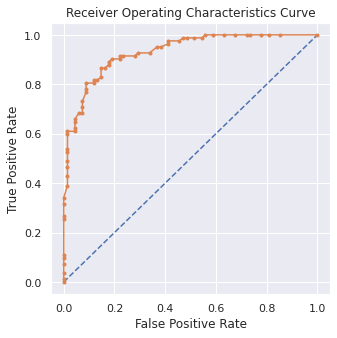

In [115]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = rf2.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_rf = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_rf)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics Curve");

In [116]:
models.append('RF')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_dt)

4. K-Nearest Neighbour (KNN) Classification:

In [117]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=3)

In [118]:
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [119]:
knn1.score(X_train,y_train)

0.8835294117647059

In [120]:
knn1.score(X_test,y_test)

0.7866666666666666

Performance evaluation and optimizing parameters using GridSearchCV:

In [121]:
knn_neighbors = [i for i in range(2,16)]
parameters = {
    'n_neighbors': knn_neighbors
}

In [122]:
gs_knn = GridSearchCV(estimator=knn1, param_grid=parameters, cv=5, verbose=0)
gs_knn.fit(health_data_X_resampled, health_data_y_resampled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

In [123]:
gs_knn.best_params_

{'n_neighbors': 3}

In [124]:
gs_knn.best_score_

0.771

In [125]:
# gs_knn.cv_results_
gs_knn.cv_results_['mean_test_score']

array([0.76 , 0.771, 0.765, 0.757, 0.757, 0.739, 0.744, 0.746, 0.744,
       0.755, 0.751, 0.755, 0.754, 0.749])

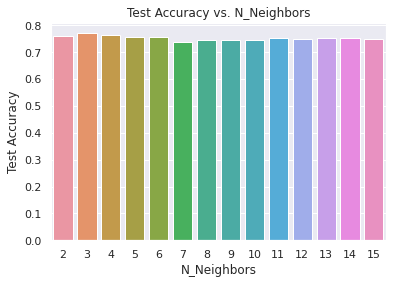

In [126]:
plt.figure(figsize=(6,4))
sns.barplot(x=knn_neighbors, y=gs_knn.cv_results_['mean_test_score'])
plt.xlabel("N_Neighbors")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs. N_Neighbors");

In [127]:
knn2 = KNeighborsClassifier(n_neighbors=3)

In [128]:
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [129]:
knn2.score(X_train,y_train)

0.8835294117647059

In [130]:
knn2.score(X_test,y_test)

0.7866666666666666

f1=0.814 auc_pr=0.885 ap=0.832


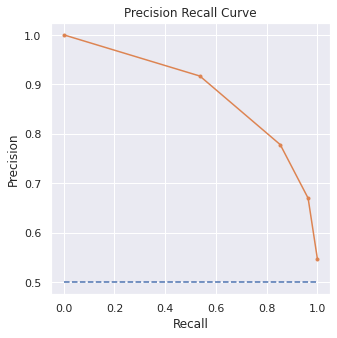

In [132]:
# Precision Recall Curve 

pred_y_test = knn2.predict(X_test)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_knn_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_knn_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve");

AUC: 0.852


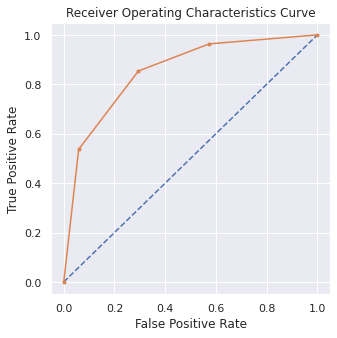

In [131]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = knn2.predict_proba(X_test)               # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_knn = roc_auc_score(y_test, probs)           # calculate AUC
print('AUC: %.3f' %auc_knn)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics Curve");

In [133]:
models.append('KNN')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_knn)

5. Support Vector Machine (SVM) Algorithm:

In [134]:
from sklearn.svm import SVC
svm1 = SVC(kernel='rbf')

In [135]:
svm1.fit(X_train, y_train)

SVC()

In [136]:
svm1.score(X_train, y_train)

0.7282352941176471

In [137]:
svm1.score(X_test, y_test)

0.78

Performance evaluation and optimizing parameters using GridSearchCV:

In [148]:
parameters = {
    'C':[1, 5, 10, 15, 20, 25],
    'gamma':[0.001, 0.005, 0.0001, 0.00001]
}

In [149]:
gs_svm = GridSearchCV(estimator=svm1, param_grid=parameters, cv=5, verbose=0)
gs_svm.fit(health_data_X_resampled, health_data_y_resampled)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20, 25],
                         'gamma': [0.001, 0.005, 0.0001, 1e-05]})

In [150]:
gs_svm.best_params_

{'C': 20, 'gamma': 0.005}

In [151]:
gs_svm.best_score_

0.8089999999999999

In [165]:
svm2 = SVC(kernel='rbf', C=20, gamma=0.005, probability=True)

In [166]:
svm2.fit(X_train, y_train)

SVC(C=20, gamma=0.005, probability=True)

In [167]:
svm2.score(X_train, y_train)

0.9941176470588236

In [168]:
svm2.score(X_test, y_test)

0.8133333333333334

AUC: 0.857


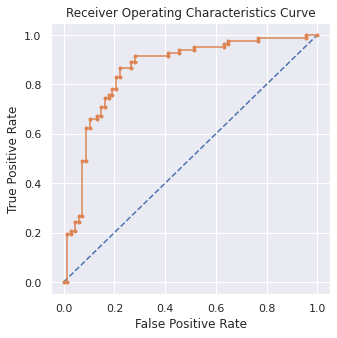

In [170]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = svm2.predict_proba(X_test)               # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_svm = roc_auc_score(y_test, probs)           # calculate AUC
print('AUC: %.3f' %auc_svm)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics Curve");

f1=0.829 auc_pr=0.830 ap=0.837


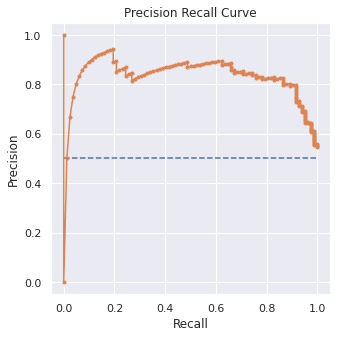

In [171]:
# Precision Recall Curve 

pred_y_test = svm2.predict(X_test)                                    # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_svm_pr = auc(recall, precision)                                   # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_svm_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve");

In [172]:
models.append('SVM')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_svm)

6. Naive Bayes Algorithm:

In [173]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
gnb = GaussianNB()

In [174]:
gnb.fit(X_train, y_train)

GaussianNB()

In [175]:
gnb.score(X_train, y_train)

0.7294117647058823

In [176]:
gnb.score(X_test, y_test)

0.8

Naive Bayes has almost no hyperparameters to tune, so it usually generalizes well.

f1=0.819 auc_pr=0.879 ap=0.880


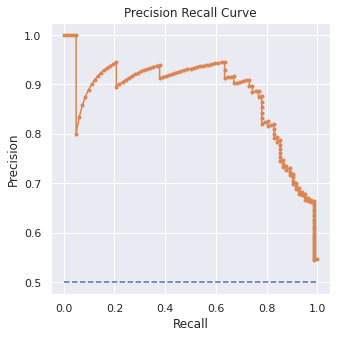

In [178]:
# Precision Recall Curve 

pred_y_test = gnb.predict(X_test)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_gnb_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_gnb_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve");

AUC: 0.873


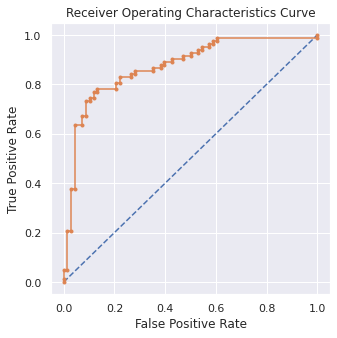

In [179]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = gnb.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_gnb = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_gnb)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics Curve");

In [180]:
models.append('GNB')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_gnb)

7. Ensemble Learning --> Boosting --> Adaptive Boosting:

In [181]:
from sklearn.ensemble import AdaBoostClassifier
ada1 = AdaBoostClassifier(n_estimators=100)

In [182]:
ada1.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [183]:
ada1.score(X_train,y_train)  

0.8564705882352941

In [184]:
ada1.score(X_test, y_test)

0.7666666666666667

Performance evaluation and optimizing parameters using cross_val_score:

In [185]:
parameters = {'n_estimators': [100,200,300,400,500,700,1000]}

In [187]:
gs_ada = GridSearchCV(ada1, param_grid = parameters, cv=5, verbose=0)
gs_ada.fit(health_data_X_resampled, health_data_y_resampled)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(n_estimators=100),
             param_grid={'n_estimators': [100, 200, 300, 400, 500, 700, 1000]})

In [188]:
gs_ada.best_params_

{'n_estimators': 500}

In [189]:
gs_ada.best_score_

0.785

In [190]:
ada1.feature_importances_

array([0.03, 0.16, 0.2 , 0.11, 0.16, 0.18, 0.11, 0.05])

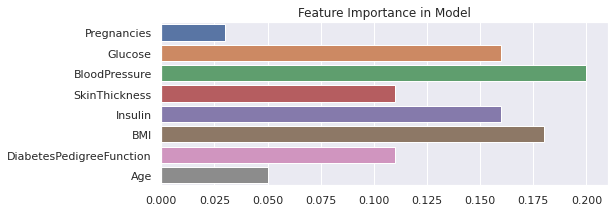

In [191]:
plt.figure(figsize=(8,3))
sns.barplot(y=X_train.columns, x=ada1.feature_importances_)
plt.title("Feature Importance in Model");

In [192]:
ada2 = AdaBoostClassifier(n_estimators=500)

In [193]:
ada2.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=500)

In [194]:
ada2.score(X_train,y_train)

0.9247058823529412

In [195]:
ada2.score(X_train,y_train)

0.9247058823529412

f1=0.785 auc_pr=0.879 ap=0.880


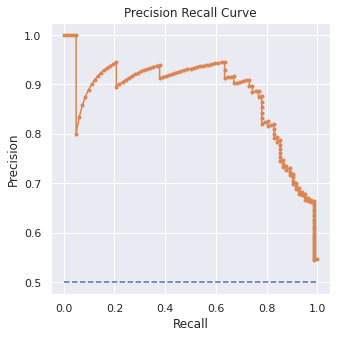

In [196]:
# Precision Recall Curve 

pred_y_test = ada2.predict(X_test)                                    # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_ada_pr = auc(recall, precision)                                   # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_ada_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve");

AUC: 0.850


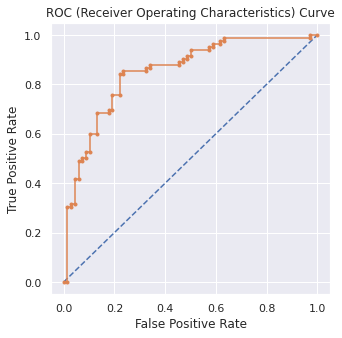

In [197]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = ada2.predict_proba(X_test)               # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_ada = roc_auc_score(y_test, probs)           # calculate AUC
print('AUC: %.3f' %auc_ada)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

In [198]:
models.append('ADA')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_ada)

8. Ensemble Learning --> Boosting --> Gradient Boosting (XGBClassifier):

In [199]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(use_label_encoder=False, objective = 'binary:logistic', nthread=4, seed=10)

In [200]:
xgb1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=4, nthread=4, num_parallel_tree=1, predictor='auto',
              random_state=10, reg_alpha=0, ...)

In [201]:
xgb1.score(X_train, y_train) 

1.0

In [202]:
xgb1.score(X_test, y_test)

0.8266666666666667

Performance evaluation and optimizing parameters using GridSearchCV:

In [213]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [214]:
gs_xgb = GridSearchCV(xgb1, param_grid = parameters, scoring = 'roc_auc', n_jobs = 10, cv=5, verbose=0)
gs_xgb.fit(health_data_X_resampled, health_data_y_resampled)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=4, nthread=4,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=10, reg_alpha=0, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc')

In [215]:
gs_xgb.best_params_

{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 180}

In [216]:
gs_xgb.best_score_

0.88522

In [217]:
xgb1.feature_importances_

array([0.09883171, 0.23199296, 0.09590795, 0.08073226, 0.10332598,
       0.15247224, 0.08829137, 0.14844562], dtype=float32)

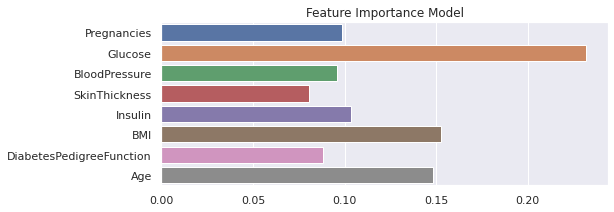

In [218]:
plt.figure(figsize=(8,3))
sns.barplot(y=X_train.columns, x=xgb1.feature_importances_)
plt.title("Feature Importance Model");

In [219]:
xgb2 = XGBClassifier(use_label_encoder=False, objective = 'binary:logistic', 
                    nthread=4, seed=10, learning_rate= 0.05, max_depth= 7, n_estimators= 180)

In [220]:
xgb2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=180,
              n_jobs=4, nthread=4, num_parallel_tree=1, predictor='auto',
              random_state=10, reg_alpha=0, ...)

In [221]:
xgb2.score(X_train,y_train)

0.9976470588235294

f1=0.824 auc_pr=0.936 ap=0.937


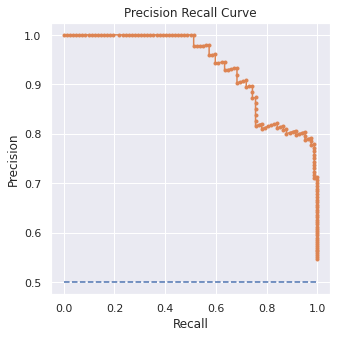

In [222]:
# Precision Recall Curve 

pred_y_test = xgb2.predict(X_test)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_xgb_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_xgb_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve");

AUC: 0.922


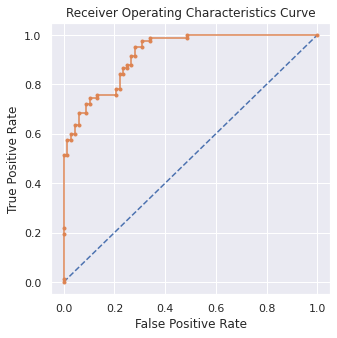

In [223]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = xgb2.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_xgb = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_xgb)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics Curve");

In [224]:
models.append('XGB')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_xgb)

In [225]:
model_summary = pd.DataFrame(zip(models,model_accuracy,model_f1,model_auc), columns = ['model','accuracy','f1_score','auc'])
model_summary = model_summary.set_index('model')

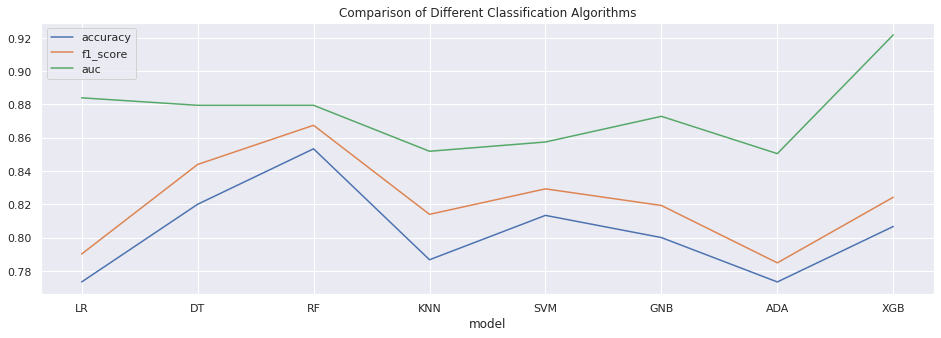

In [226]:
model_summary.plot(figsize=(16,5))
plt.title("Comparison of Different Classification Algorithms");

In [227]:
model_summary

,accuracy,f1_score,auc
model,,,
LR,0.773333,0.790123,0.883967
DT,0.820000,0.843931,0.879484
RF,0.853333,0.867470,0.879484
KNN,0.786667,0.813953,0.851865
SVM,0.813333,0.829268,0.857425
GNB,0.800000,0.819277,0.872848
ADA,0.773333,0.784810,0.850430
XGB,0.806667,0.824242,0.921808


Among all models, RandomForest has given best accuracy and f1_score. Therefore we will build final model using RandomForest.

FINAL CLASSIFIER:

In [228]:
final_model = rf2

4. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc.
Please be descriptive to explain what values of these parameter you have used.

In [229]:
cr = classification_report(y_test, final_model.predict(X_test))
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        68
           1       0.86      0.88      0.87        82

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



In [230]:
confusion = confusion_matrix(y_test, final_model.predict(X_test))
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[56 12]
 [10 72]]


In [231]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Accuracy = (TP+TN)/(TP+TN+FP+FN)
Precision = TP/(TP+FP)
Sensitivity = TP/(TP+FN)                     # also called recall
Specificity = TN/(TN+FP)

In [232]:
print("Accuracy: %.3f"%Accuracy)
print("Precision: %.3f"%Precision)
print("Sensitivity: %.3f"%Sensitivity)
print("Specificity: %.3f"%Specificity)
print("AUC: %.3f"%auc_rf)

Accuracy: 0.853
Precision: 0.857
Sensitivity: 0.878
Specificity: 0.824
AUC: 0.931


Sensitivity and Specificity: By changing the threshold, target classification will be changed hence the sensitivity and specificity will also be changed. Which one of these two we should maximize? What should be ideal threshold?

Ideally we want to maximize both Sensitivity & Specificity. But this is not possible always. There is always a trade-off. Sometimes we want to be 100% sure on Predicted negatives, sometimes we want to be 100% sure on Predicted positives. Sometimes we simply don’t want to compromise on sensitivity sometimes we don’t want to compromise on specificity.

The threshold is set based on business problem. There are some cases where Sensitivity is important and need to be near to 1. There are business cases where Specificity is important and need to be near to 1. We need to understand the business problem and decide the importance of Sensitivity and Specificity.